In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1) 데이터 로드 및 확인

In [2]:
train_data = pd.read_csv('Data/01_Titanic/train.csv')
test_data = pd.read_csv('Data/01_Titanic/test.csv')

In [3]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


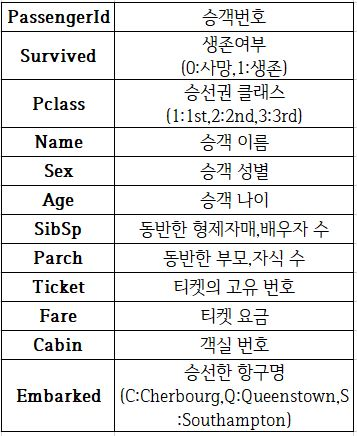

In [5]:
from IPython.display import Image

Image("Data/01_Titanic/#Titanic_Description.jpg")

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# NaN 값 채우기 및 불필요한 칼럼 제거
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####  2) 데이터 시각화

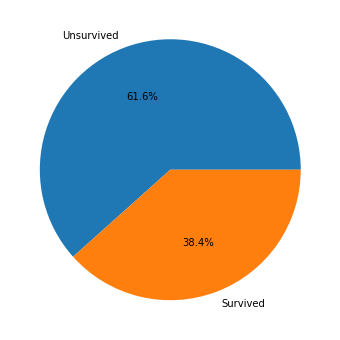

In [9]:
# 생존자 수
labels = ['Unsurvived','Survived']
survivied = train_data['Survived'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(labels=labels,x=survivied,autopct='%1.1f%%')
plt.show()

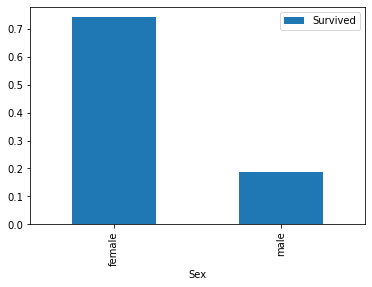

In [10]:
# 성별 별 생존자
sex_survived = train_data[['Sex','Survived']].groupby(['Sex']).mean()
sex_survived.plot(kind='bar')

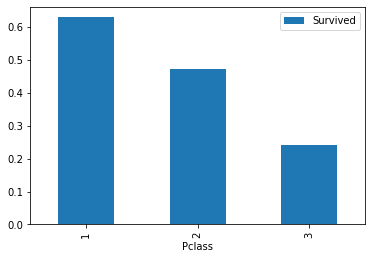

In [11]:
# 승선권 클래스 별 생존자
class_survived = train_data[['Pclass','Survived']].groupby(['Pclass']).mean()
class_survived.plot(kind='bar')

#### 3) 알고리즘 적용

In [12]:
# Target Label(Survived) 분리
x_data = train_data.drop('Survived',axis=1)
y_data = train_data['Survived']

In [13]:
# 카테고리형 칼럼 인코딩
x_data = pd.get_dummies(x_data,columns=['Pclass','Sex','Embarked'])
test_data = pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked'])

x_data.head(3)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


In [14]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [15]:
# 로지스틱 회귀 적용
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

C:\Users\chltp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [17]:
from sklearn.metrics import accuracy_score
print("학습세트:",model.score(x_train,y_train))
print("테스트세트:",accuracy_score(y_test,predict))

학습세트: 0.8019662921348315
테스트세트: 0.8044692737430168


In [18]:
# 데이터 스케일링 추가 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [19]:
# 다시 로지스틱 회귀 적용
model = LogisticRegression()
model.fit(scaled_x_train,y_train)
predict = model.predict(scaled_x_test)

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [20]:
print("학습세트:",model.score(scaled_x_train,y_train))
print("테스트세트:",accuracy_score(y_test,predict))

학습세트: 0.8019662921348315
테스트세트: 0.8044692737430168


In [21]:
# KNN 적용
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(scaled_x_train,y_train)
predict = model.predict(scaled_x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [22]:
print("학습세트:",model.score(scaled_x_train,y_train))
print("테스트세트:",accuracy_score(y_test,predict))

학습세트: 0.8735955056179775
테스트세트: 0.8044692737430168


In [23]:
# 적절한 k값 찾기
train_accuracy=[]
test_accuracy=[]

for n in range(1,15):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(scaled_x_train,y_train)
    predict = model.predict(scaled_x_test)
    train_accuracy.append(model.score(scaled_x_train,y_train))
    test_accuracy.append(accuracy_score(y_test,predict))

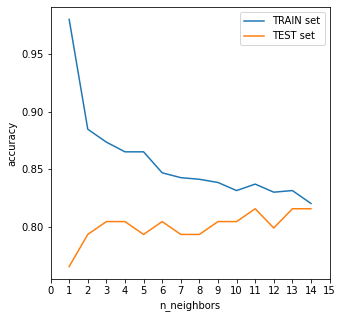

In [24]:
plt.figure(figsize=(5,5))
plt.plot(range(1, 15), train_accuracy, label='TRAIN set')
plt.plot(range(1, 15), test_accuracy, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1)) #그래프의 눈금 
plt.legend()

In [25]:
# 앙상블 적용
from sklearn.ensemble import VotingClassifier
logistic= LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic), ('KNN', knn)], voting='soft')

In [26]:
voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.88      0.61      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



C:\Users\chltp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
print("학습세트:",model.score(scaled_x_train,y_train))
print("테스트세트:",accuracy_score(y_test,predict))

학습세트: 0.8202247191011236
테스트세트: 0.8156424581005587


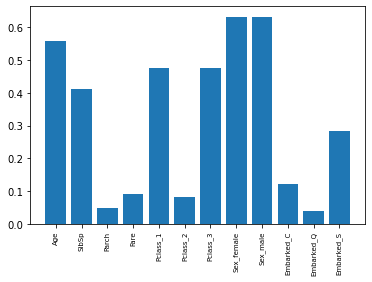

In [28]:
# 피처별 중요도 확인
logistic.fit(scaled_x_train,y_train)
feature_importance = np.abs(logistic.coef_[0])
label = [col for col in x_train.columns]
index = np.arange(len(label))
plt.bar([x for x in range(len(feature_importance))],feature_importance)
plt.xticks(index, label, fontsize=7,rotation=90)
plt.show()

In [29]:
# 중요도가 낮은 칼럼 수정 후 다시 로지스틱 회귀 적용
x_data['Fellow'] = x_data['SibSp']+x_data['Parch']
x_data.drop(['SibSp','Parch'],axis=1,inplace=True)

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(scaled_x_train,y_train)
predict = model.predict(scaled_x_test)

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [30]:
print("학습세트:",model.score(scaled_x_train,y_train))
print("테스트세트:",accuracy_score(y_test,predict))

학습세트: 0.8019662921348315
테스트세트: 0.8100558659217877


In [31]:
# 최종적으로 앙상블 적용
logistic= LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic), ('KNN', knn)], voting='soft')

voting_model.fit(scaled_x_train, y_train)
pred = voting_model.predict(scaled_x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [32]:
print("학습세트:",voting_model.score(scaled_x_train,y_train))
print("테스트세트:",accuracy_score(y_test,predict))

학습세트: 0.8553370786516854
테스트세트: 0.8100558659217877


#### 4) 최종 테스트 데이터에 적용 후 제출

In [33]:
test_data.head(3)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Pclass_1    418 non-null    uint8  
 5   Pclass_2    418 non-null    uint8  
 6   Pclass_3    418 non-null    uint8  
 7   Sex_female  418 non-null    uint8  
 8   Sex_male    418 non-null    uint8  
 9   Embarked_C  418 non-null    uint8  
 10  Embarked_Q  418 non-null    uint8  
 11  Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


In [35]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [36]:
test_data['Fellow'] = test_data['SibSp']+test_data['Parch']
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [37]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(x_data)
scaled_test = scaler.transform(test_data)

In [38]:
logistic= LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic), ('KNN', knn)], voting='soft')

voting_model.fit(scaled_train, y_data)
pred = voting_model.predict(scaled_test)

In [39]:
test_data['Survived'] = pred
test_data.head(3)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fellow,Survived
0,34.5,7.8292,0,0,1,0,1,0,1,0,0,0
1,47.0,7.0000,0,0,1,1,0,0,0,1,1,0
2,62.0,9.6875,0,1,0,0,1,0,1,0,0,0


In [43]:
to_submit =pd.read_csv('Data/01_Titanic/test.csv')
submit=pd.DataFrame(to_submit['PassengerId'])
submit['Survived'] = pred

In [45]:
submit.to_csv('C:\\Users\\chltp\\Kaggle\\Data\\01_Titanic\\submit.csv',sep=',',index=False)